# DELE CA1 Part A: Convolutional Neural Network

# Student ID: p2317959

# Name: Nicholas Ngan Wei Hon

# Class: DAAA/FT/2B/23

# Contents

## 1 Background Research
### - 1.1 Understanding the Assignment Specifications
## 2 Exploratory Data Analysis (EDA)
### - 2.1 First look at the dataset
### - 2.2 Researching more on the origins of the dataset
### - 2.3 More in-depth EDA
## 3 Data Pre-processing (Feature Engineering and Data Augmentation)
### - 3.1 Image Data Normalization
### - 3.2 Encoding Categorical Labels (y)
### - 3.3 Model Improvement: Data Augmentation
## 4 Modelling and Evaluation
### - 4.1 Basic Model (37x37)
### - 4.2 Basic Model with Augmented Data (37x37)
### (Confusion matrix for all the models)
### - 4.3 Custom Model (37x37)
### - 4.4 Custom Model (131x131)

(Note that there is some overlap between the topics, e.g. data augmentation could technically be considered both Model Improvement and Data Pre-processing but I included it in Data Pre-processing)

# 1 Background Research

The first thing to do is understand the Part A assignment specifications in the CA1 brief. This (combined with Exploratory Data Analysis (EDA) in the next section) will assist us in clearly defining the Deep Learning Task, which is the most important thing as we would have a better idea of how to perform the workflow for developing the Deep Learning model for my assignment.

## 1.1 Understanding the Assignment Specifications

> (reference: ST1504 DELE Assignment Brief) Task:
>
> Implement an image classifier using a deep learning network. You are given colour
    images of 224 by 224 pixels, containing 15 types of vegetables.
>
> You must convert the given images into grayscale (i.e. only 1 channel instead of 3).
>
> Consider two different input sizes: **a)** 37 by 37 pixels **b)** 131 by 131 pixels
>
> Build two types of neural networks, one for each input size. Compare and discuss the
    classification accuracies for each input size.

### First thoughts and What to include in the workflow:

We can see that this is a (image) classification task. Thus, the task would be to train a deep learning network to classify images of vegetables into their respective vegetable classes.
- Implement a convolutional neural network (CNN) (as stated in the assignment)
- Find out more about the classes of vegetables, and view how the vegetable pictures for each class are like

We are also required to process the image data into grayscale and cater for input sizes of 37x37 and 131x131 pixels.
- Loading the data in grayscale and as 2 of the required sizes
- Training 2 CNNs for both sizes

It would be helpful to understand why the accuracies for the network I am building is the way it is.
- Try to focus more on the theory behind the steps of implementing the CNN

Now that we have a better understanding of what exactly to implement, we will move on to EDA to understand the dataset better.

# 2 Exploratory Data Analysis (EDA)
As emphasized earlier, it is important to conduct EDA as this will give us a starting point for thinking about how to process the data in Feature Engineering to make it ready to train the models. Understanding the data would also hopefully give an idea of how to design the CNN architecture.

## 2.1 First look at the dataset

In [11]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Reference: Dr. Wilson's showcased code for how to load the CA1 dataset
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# loading with 131 pixels first
pixels = 131
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory='Dataset for CA1 part A - AY2425S1/train',
                                                                 color_mode="grayscale",
                                                                image_size=(pixels, pixels),
                                                                 batch_size=100000)
# View classes
print('The classes are:', train_data.class_names)

# Separate into X (features) and y (labels)
for X, y in train_data:
    X_train = X
    y_train = y

Found 9043 files belonging to 15 classes.
The classes are: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [13]:
# view shapes and sample of X and y
print('Shape of X', X_train.shape)
# convert to numpy array for viewing
print(X_train[0].numpy())
print('Shape of y', y_train.shape)
# convert to numpy array for viewing
print(y_train[0].numpy())

Shape of X (9043, 131, 131, 1)
[[[ 72.41607 ]
  [ 58.7706  ]
  [ 56.174915]
  ...
  [ 81.95103 ]
  [ 79.16935 ]
  [ 79.22561 ]]

 [[ 80.35167 ]
  [ 69.644646]
  [ 65.95354 ]
  ...
  [120.47521 ]
  [109.47288 ]
  [ 73.51755 ]]

 [[ 87.61538 ]
  [ 90.514725]
  [ 88.84732 ]
  ...
  [141.99023 ]
  [122.005005]
  [ 78.09962 ]]

 ...

 [[ 63.499783]
  [ 62.74045 ]
  [ 63.92694 ]
  ...
  [ 52.399048]
  [ 66.039085]
  [ 53.163376]]

 [[ 61.12979 ]
  [ 63.194675]
  [ 61.855648]
  ...
  [ 58.78266 ]
  [ 71.96416 ]
  [ 50.13864 ]]

 [[ 59.      ]
  [ 61.083706]
  [ 60.240673]
  ...
  [ 53.500267]
  [ 55.931866]
  [ 49.858967]]]
Shape of y (9043,)
5


In the training set, there are 9043 images that belong to 15 classes. So this means that there are 9043 samples in total, and 15 types of vegetables in total.

(Reference: https://www.analyticsvidhya.com/blog/2021/03/grayscale-and-rgb-format-for-storing-images/#:~:text=For%20a%20grayscale%20or%20b%26w,lighter%20or%20the%20white%20shade.)

From the shape and sample, we can tell that:
- For X, the images have been loaded as 37x37 array of numbers. Since we specified earlier to load the images as grayscale, there is only 1 channel and hence 1 dimension. These numbers would be in a range from 0 to 255 inclusive, where 0 = Totally Black and 255 = Totally White and the larger the number, the lighter the colour of the pixel.
- For y, it is an 1-dimensional array of integers, where each integer corresponds to a class of vegetable.

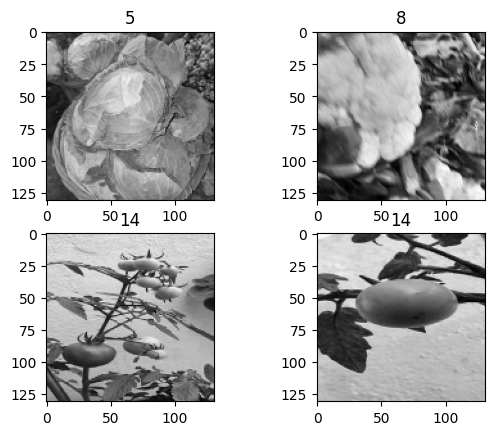

In [14]:
# plot 4 sample images with their labels
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(X_train[0], cmap=plt.get_cmap('gray'))
ax[0,1].imshow(X_train[1], cmap=plt.get_cmap('gray'))
ax[1,0].imshow(X_train[2], cmap=plt.get_cmap('gray'))
ax[1,1].imshow(X_train[3], cmap=plt.get_cmap('gray'))

# set titles as the labels
ax[0, 0].set_title(y_train[0].numpy())
ax[0, 1].set_title(y_train[1].numpy())
ax[1, 0].set_title(y_train[2].numpy())
ax[1, 1].set_title(y_train[3].numpy())

# show the plot
plt.show()

(for my first time loading)
We can see the images of vegetables (X_train) and their respective labels (y_train) which appear to be numbers like 3 and 12. Although very pixelated, we can see that the top left image resembles a pumpkin. 

Notice that the bottom 2 images are of the same class (3), and the round-looking vegetable is also present in both images.

### Important discussion point: Data Variation

I also noticed that the pictures are of different varieties (through the subplot and briefly scanning through the images in the folder:
- Some include a hand holding a single vegetable,
- Some include a pile of the same vegetable, and
- Others include a single vegetable on a surface.

This is actually a good thing. Let's say our dataset only included images of single vegetables taken in a photo studio and we trained a model on this dataset. This would lead to overfitting since the model cannot generalize well to real-world data! What if we took a picture of a pile of the same vegetable in a farm and fed it to the trained model as input? This image could have a high chance of getting misclassified, because you could say the model has not "seen" this kind of image before. I interpret this as the model assuming that all vegetables fed as input would be neatly taken in a photo studio, but this would rarely be the case in real life applications.

Humans like us would be able to tell that it is the same vegetable. But since the model "sees" things differently from us humans, it may interpret a single vegetable vs a pile of the same vegetable as different classes of vegetables.

With the goal of building a vegetable image classifier, it would be good practice to train our model with as many variations as possible.  Therefore, including vegetables taken in different environments and surroundings is beneficial to improving the accuracy of our model.

## 2.2 Researching more on the origins of the dataset

I searched "deep learning vegetable dataset" on Google and found this source:

(Reference: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)

This dataset appears very similar to the one for this CA1 assignment. There are the same 15 classes of vegetables, image sizes are both originally 224x224 pixels. The dataset has also been split nicely into test, train, and validation folders just like the CA1 dataset. One of the differences include the CA1 dataset's train having 9043 images while this dataset has 15000 images in train.

The original dataset was used to train a deep learning model with the goal of classifying vegetables so that there is no human required to manually classify them. Hopefully we can achieve a model that we can use to classify vegetables with a high accuracy too in the next sections :)

## 2.3 More in-depth EDA

Now that we have taken a brief look at sample data, we will use other functions to further explore the dataset.

### Analysing data in the test, train and validation folders

### Loading 37x37 dataset

In [15]:
# Load test, train, validation
pixels = 37

train_data_37 = tf.keras.preprocessing.image_dataset_from_directory(directory='Dataset for CA1 part A - AY2425S1/train',
                                                                 color_mode="grayscale",
                                                                image_size=(pixels, pixels),
                                                                 batch_size=100000)
test_data_37 = tf.keras.preprocessing.image_dataset_from_directory(directory='Dataset for CA1 part A - AY2425S1/test',
                                                                 color_mode="grayscale",
                                                                image_size=(pixels, pixels),
                                                                 batch_size=100000)
validation_data_37 = tf.keras.preprocessing.image_dataset_from_directory(directory='Dataset for CA1 part A - AY2425S1/validation',
                                                                 color_mode="grayscale",
                                                                image_size=(pixels, pixels),
                                                                 batch_size=100000)

# Separate into X (features) and y (labels) for the 3 types of data
for X, y in train_data_37:
    X_train_37 = X
    y_train_37 = y

for X, y in test_data_37:
    X_test_37 = X
    y_test_37 = y

for X, y in validation_data_37:
    X_validation_37 = X
    y_validation_37 = y

Found 9043 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


### 37x37 Shape

In [16]:
# import libraries
import numpy as np

# view shapes and of X and y
print('Shape of X_train_37', X_train_37.shape)
print('Shape of y_train_37', y_train_37.shape)

print('Shape of X_test_37', X_test_37.shape)
print('Shape of y_test_37', y_test_37.shape)

print('Shape of X_validation_37', X_validation_37.shape)
print('Shape of y_validation_37', y_validation_37.shape)

Shape of X_train_37 (9043, 37, 37, 1)
Shape of y_train_37 (9043,)
Shape of X_test_37 (3000, 37, 37, 1)
Shape of y_test_37 (3000,)
Shape of X_validation_37 (3000, 37, 37, 1)
Shape of y_validation_37 (3000,)


### Loading 131x131 dataset

In [17]:
# Load test, train, validation
pixels = 131

train_data_131 = tf.keras.preprocessing.image_dataset_from_directory(directory='Dataset for CA1 part A - AY2425S1/train',
                                                                 color_mode="grayscale",
                                                                image_size=(pixels, pixels),
                                                                 batch_size=100000)
test_data_131 = tf.keras.preprocessing.image_dataset_from_directory(directory='Dataset for CA1 part A - AY2425S1/test',
                                                                 color_mode="grayscale",
                                                                image_size=(pixels, pixels),
                                                                 batch_size=100000)
validation_data_131 = tf.keras.preprocessing.image_dataset_from_directory(directory='Dataset for CA1 part A - AY2425S1/validation',
                                                                 color_mode="grayscale",
                                                                image_size=(pixels, pixels),
                                                                 batch_size=100000)

# Separate into X (features) and y (labels) for the 3 types of data
for X, y in train_data_131:
    X_train_131 = X
    y_train_131 = y

for X, y in test_data_131:
    X_test_131 = X
    y_test_131 = y

for X, y in validation_data_131:
    X_validation_131 = X
    y_validation_131 = y

Found 9043 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


### 131x131 Shape

In [18]:
# import libraries
import numpy as np

# view shapes and of X and y
print('Shape of X_train_131', X_train_131.shape)
print('Shape of y_train_131', y_train_131.shape)

print('Shape of X_test_131', X_test_131.shape)
print('Shape of y_test_131', y_test_131.shape)

print('Shape of X_validation_131', X_validation_131.shape)
print('Shape of y_validation_131', y_validation_131.shape)

Shape of X_train_131 (9043, 131, 131, 1)
Shape of y_train_131 (9043,)
Shape of X_test_131 (3000, 131, 131, 1)
Shape of y_test_131 (3000,)
Shape of X_validation_131 (3000, 131, 131, 1)
Shape of y_validation_131 (3000,)


### Visualising which class each number corresponds to, and an image of the vegetable
Assume that the results would be the same for 37x37, the only difference is that the image is more pixelated since the only thing changed is the image_size.

Class numbers and vegetables associated:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


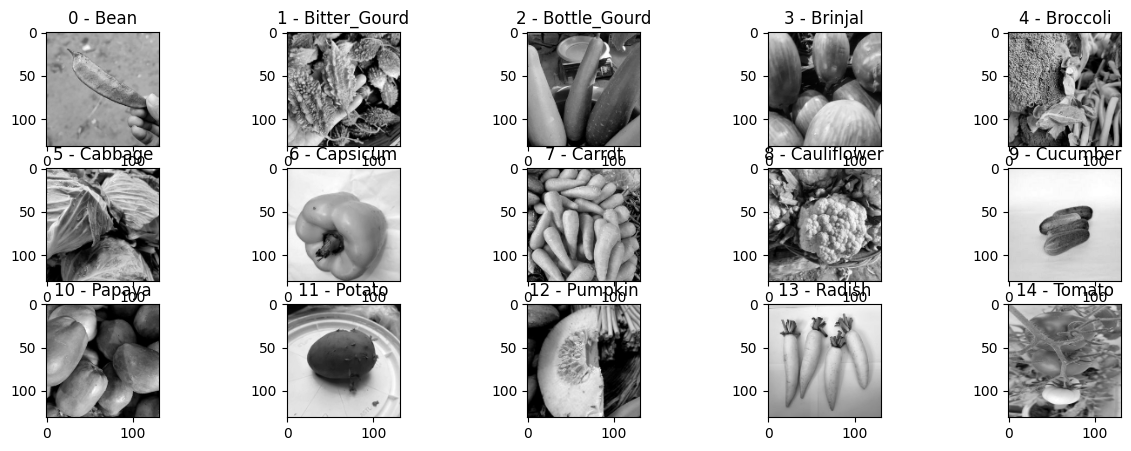

In [19]:
# view classes and the number representing them
classes = np.unique(y_train_131.numpy())
classes_names = train_data_131.class_names
classes_indexes = np.array([])
print('Class numbers and vegetables associated:')
print(classes)
print(classes_names)

# find out the index of images of different classes so i know which images to plot corresponding to the label
for i in classes:
    classes_indexes = np.append(classes_indexes, np.where(y_train_131==i)[0][0])
classes_indexes = classes_indexes.astype(int)

# create subplot of 3x5 for the 15 classes of vegetables
fig, ax = plt.subplots(3, 5, figsize=(15,5))

# Visualize the classes and their associated vegetables
class_to_show = 0
for i in range(0,3):
    for j in range(0,5):
        ax[i,j].imshow(X_train_131[classes_indexes[class_to_show]], cmap=plt.get_cmap('gray'))
        label = str(classes[class_to_show]) + ' - ' + str(classes_names[class_to_show])
        ax[i,j].set_title(str(label))
        class_to_show = class_to_show + 1

# show the plot
plt.show()

I loaded 131x131 images first because it is easier to view the vegetable in the image. As we can see, the label corresponds to a type of vegetable, e.g. A radish image in X would have a label of 13 in Y.

### Visualising class distribution

Class frequencies for Train:
[795 720 441 868 750 503 351 256 587 812 566 377 814 248 955]
Class frequencies for Test:
[200 200 200 200 200 200 200 200 200 200 200 200 200 200 200]
Class frequencies for Validation:
[200 200 200 200 200 200 200 200 200 200 200 200 200 200 200]


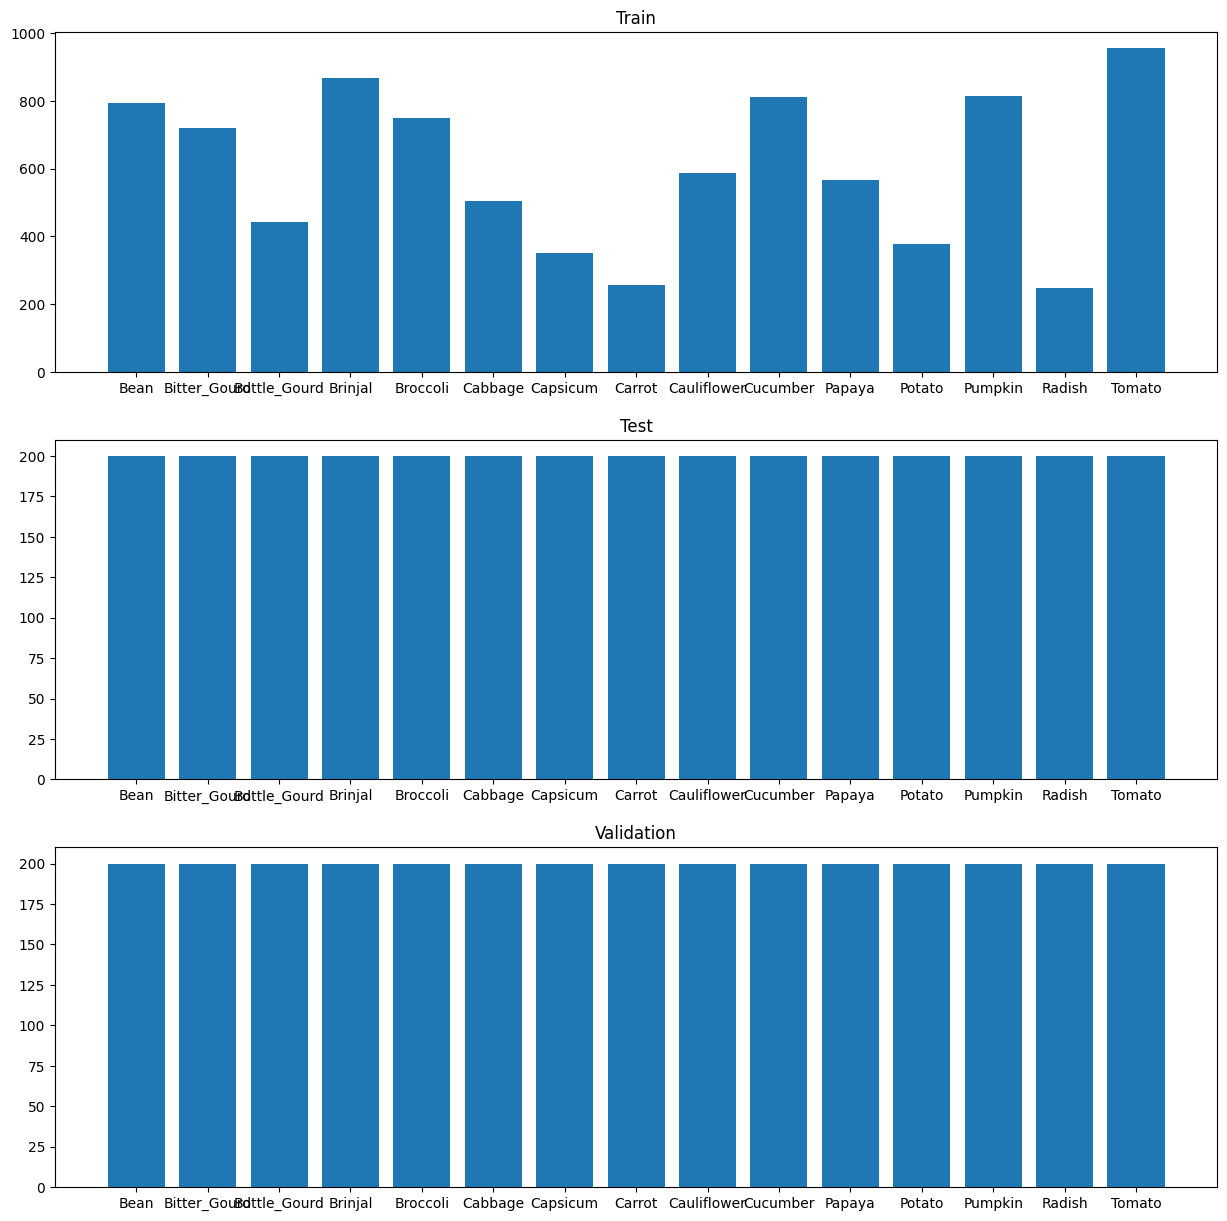

In [20]:
# create subplot of 3x1 for train, test and validation
fig, ax = plt.subplots(3, 1, figsize=(15,15))
y_in_order = [y_train_131, y_test_131, y_validation_131]
y_types = ['Train', 'Test', 'Validation']

classes_names = train_data_131.class_names

for i in range(0, 3):
    y_unique, y_frequencies = np.unique(y_in_order[i], 
                              return_counts = True)
    ax[i].bar(classes_names, y_frequencies)
    ax[i].set_title(y_types[i])
    print('Class frequencies for ' + y_types[i] + ':\n' + str(y_frequencies))

Here, we encounter our first problem with the dataset. For test and validation sets, the classes are balanced at 200 samples for each class. However, the train set is quite imbalanced, e.g. 955 samples for Tomato but 248 samples for Radish and 441 samples for Bitter Gourd. This can also be seen visually, as the heights of bars for test and validation are all equal but the heights of bars for train varies widely.

**Why is this a problem?** For example, if the model is trained on 1000 images of Tomato and 200 images of Radish, and we evaluate its performance using 200 images of Tomato and 200 images of Radish, the model would obviously achieve a higher accuracy for Tomato than Radish because it has been trained more on classifying Tomato images than Radish images. Since there are much less train images for Radish, it may lead to overfitting since the 200 images would cover a much smaller variety of Radish images and thus the model would not generalise as well to real-world Radish images (test set) than for Tomato. In a human analogy, it would be like studying 5x more for English than Math: of course you would score better for English.

We will deal with this class imbalance in Data Pre-processing.

# 3 Data Pre-processing (Feature Engineering and Data Augmentation)

## 3.1 Image Data Normalization

### Verifying pixel value range

In [21]:
def print_min_max_pixels(images):
    # flatten into 1 dimensional array
    images_flattened = images.flatten()
    print(images_flattened.shape)
    max_pixel_value = np.max(images_flattened)
    min_pixel_value = np.min(images_flattened)
    
    print(f'Max pixel value: {max_pixel_value}')
    print(f'Min pixel value: {min_pixel_value}')

X_sets = [X_train_131.numpy(), X_test_131.numpy(), X_validation_131.numpy(), X_train_37.numpy(), X_test_37.numpy(), X_validation_37.numpy()]
X_types = ['Train 131x131', 'Test 131x131', 'Validation 131x131', 'Train 37x37', 'Test 37x37', 'Validation 37x37']

for i in range(0,6):
    print(f'For {X_types[i]}:')
    print_min_max_pixels(X_sets[i])
    print()

For Train 131x131:
(155186923,)
Max pixel value: 255.0
Min pixel value: 0.0

For Test 131x131:
(51483000,)
Max pixel value: 255.0
Min pixel value: 0.0

For Validation 131x131:
(51483000,)
Max pixel value: 255.0
Min pixel value: 0.0

For Train 37x37:
(12379867,)
Max pixel value: 255.0
Min pixel value: 0.0

For Test 37x37:
(4107000,)
Max pixel value: 255.0
Min pixel value: 0.0

For Validation 37x37:
(4107000,)
Max pixel value: 255.0
Min pixel value: 0.0



In the above code we have verified that the image data has pixel values ranging from 0 to 255. We will now normalize the pixel values.

### Normalization

For this dataset, we will simply divide the whole array by 255. Since the pixel values range from 0 to 255, this will scale the values from 0 to 1: basically a min-max range of 0 to 1. This is possible because in a pixel as we have seen above, there is a range of values which is 0 to 255, i.e. there are lower and upper limits to the value a pixel can contain. So we can assume that 0 will always represent the lowest value 0 and 1 will always represent the highest value 255. 

(https://www.researchgate.net/post/Normalizing_a_image_dataset_for_CNN)

In [22]:
X_train_131_norm = X_train_131.numpy() / 255
X_test_131_norm = X_test_131.numpy() / 255
X_validation_131_norm = X_validation_131.numpy() / 255
X_train_37_norm = X_train_37.numpy() / 255
X_test_37_norm = X_test_37.numpy() / 255
X_validation_37_norm = X_validation_37.numpy() / 255

X_sets_norm = [X_train_131_norm, X_test_131_norm, X_validation_131_norm, X_train_37_norm, X_test_37_norm, X_validation_37_norm]
X_types = ['Train 131x131', 'Test 131x131', 'Validation 131x131', 'Train 37x37', 'Test 37x37', 'Validation 37x37']

print('After normalization:')
for i in range(0,6):
    print(f'For {X_types[i]}:')
    print_min_max_pixels(X_sets_norm[i])
    print()

After normalization:
For Train 131x131:
(155186923,)
Max pixel value: 1.0
Min pixel value: 0.0

For Test 131x131:
(51483000,)
Max pixel value: 1.0
Min pixel value: 0.0

For Validation 131x131:
(51483000,)
Max pixel value: 1.0
Min pixel value: 0.0

For Train 37x37:
(12379867,)
Max pixel value: 1.0
Min pixel value: 0.0

For Test 37x37:
(4107000,)
Max pixel value: 1.0
Min pixel value: 0.0

For Validation 37x37:
(4107000,)
Max pixel value: 1.0
Min pixel value: 0.0



### Sample normalized data

In [23]:
# 131x131
# first picture
print(X_train_131_norm[0])
print(X_train_131.numpy()[0])

[[[0.5236041 ]
  [0.50904053]
  [0.49088374]
  ...
  [0.5549028 ]
  [0.567864  ]
  [0.58455336]]

 [[0.52384377]
  [0.509295  ]
  [0.4891783 ]
  ...
  [0.5614331 ]
  [0.5644679 ]
  [0.5677903 ]]

 [[0.52125514]
  [0.51619774]
  [0.50127655]
  ...
  [0.5738213 ]
  [0.5677444 ]
  [0.5557252 ]]

 ...

 [[0.46964613]
  [0.4482537 ]
  [0.41853446]
  ...
  [0.34127063]
  [0.29917672]
  [0.20642963]]

 [[0.44912404]
  [0.43503976]
  [0.4058076 ]
  ...
  [0.2957743 ]
  [0.21615882]
  [0.33055764]]

 [[0.4297409 ]
  [0.4178711 ]
  [0.39404282]
  ...
  [0.25467584]
  [0.18385315]
  [0.4112811 ]]]
[[[133.51904 ]
  [129.80534 ]
  [125.175354]
  ...
  [141.50021 ]
  [144.80531 ]
  [149.06111 ]]

 [[133.58015 ]
  [129.87022 ]
  [124.74046 ]
  ...
  [143.16544 ]
  [143.93932 ]
  [144.78653 ]]

 [[132.92006 ]
  [131.63042 ]
  [127.825516]
  ...
  [146.32443 ]
  [144.77481 ]
  [141.70993 ]]

 ...

 [[119.759766]
  [114.30469 ]
  [106.72629 ]
  ...
  [ 87.02401 ]
  [ 76.29006 ]
  [ 52.639557]]

 [[114.5

In [24]:
# 37x37
# first picture
print(X_train_37_norm[0])
print(X_train_37.numpy()[0])

[[[0.11826007]
  [0.11713573]
  [0.23597519]
  ...
  [0.6115768 ]
  [0.4834047 ]
  [0.4376397 ]]

 [[0.08095648]
  [0.2718028 ]
  [0.14031567]
  ...
  [0.45622846]
  [0.6477418 ]
  [0.16099265]]

 [[0.1556188 ]
  [0.10831431]
  [0.01964293]
  ...
  [0.59681106]
  [0.7239918 ]
  [0.18339075]]

 ...

 [[0.04891716]
  [0.00597186]
  [0.02458932]
  ...
  [0.24151751]
  [0.2462769 ]
  [0.4157824 ]]

 [[0.12887964]
  [0.06666671]
  [0.11731728]
  ...
  [0.33262762]
  [0.35437784]
  [0.02394786]]

 [[0.09415226]
  [0.02089759]
  [0.01699887]
  ...
  [0.31752995]
  [0.00886851]
  [0.01016279]]]
[[[ 30.156319 ]
  [ 29.86961  ]
  [ 60.173676 ]
  ...
  [155.95209  ]
  [123.268196 ]
  [111.59813  ]]

 [[ 20.643902 ]
  [ 69.309715 ]
  [ 35.780495 ]
  ...
  [116.33826  ]
  [165.17416  ]
  [ 41.053127 ]]

 [[ 39.682793 ]
  [ 27.620148 ]
  [  5.008948 ]
  ...
  [152.18681  ]
  [184.6179   ]
  [ 46.76464  ]]

 ...

 [[ 12.473876 ]
  [  1.5228244]
  [  6.270275 ]
  ...
  [ 61.586967 ]
  [ 62.80061  ]
  

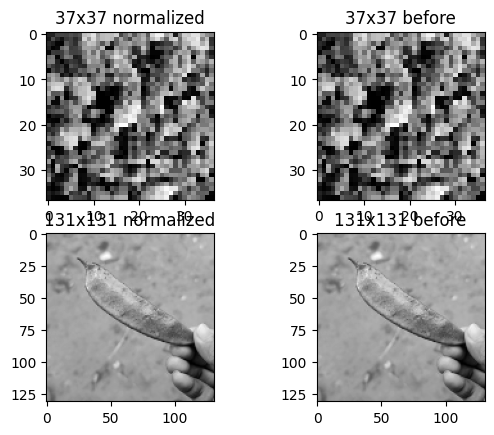

In [25]:
# Visualize normalized data
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(X_train_37_norm[0], cmap=plt.get_cmap('gray'))
ax[0,1].imshow(X_train_37.numpy()[0], cmap=plt.get_cmap('gray'))
ax[1,0].imshow(X_train_131_norm[0], cmap=plt.get_cmap('gray'))
ax[1,1].imshow(X_train_131.numpy()[0], cmap=plt.get_cmap('gray'))

# set titles as the labels
ax[0,0].set_title('37x37 normalized')
ax[0,1].set_title('37x37 before')
ax[1,0].set_title('131x131 normalized')
ax[1,1].set_title('131x131 before')

plt.show()

This is interesting: Even though we have scaled the pixel values from 0 to 255 to 0 to 1, using .imshow() still outputs the same image. This shows that the normalization still captures the variation between the pixel values (after all, all we did was divide the whole array of numbers by 255).

## 3.2 Encoding Categorical Labels (y)

Notice that the classes are integers from 0 to 14 inclusive. It would be good practice to encode them, since they represent classes and not actual continuous numbers.

In [26]:
classes_131 = np.unique(y_train_131.numpy())
classes_37 = np.unique(y_train_37.numpy())

print('Classes for 131x131: ' + str(classes_131))
print(classes_131.dtype)
print(classes_131[0:5])
print('Classes for 37x37: ' + str(classes_37))
print(classes_37.dtype)
print(classes_37[0:5])

Classes for 131x131: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
int32
[0 1 2 3 4]
Classes for 37x37: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
int32
[0 1 2 3 4]


In [27]:
# import library
from tensorflow.keras.utils import to_categorical

# 37x37
y_train_37_enc = to_categorical(y_train_37)
y_test_37_enc = to_categorical(y_test_37)
y_validation_37_enc = to_categorical(y_validation_37)

# 131x131
y_train_131_enc = to_categorical(y_train_131)
y_test_131_enc = to_categorical(y_test_131)
y_validation_131_enc = to_categorical(y_validation_131)

# show results of encoding
y_sets_norm = [y_train_131_enc, y_test_131_enc, y_validation_131_enc, y_train_37_enc, y_test_37_enc, y_validation_37_enc]
y_types = ['Train 131x131', 'Test 131x131', 'Validation 131x131', 'Train 37x37', 'Test 37x37', 'Validation 37x37']

print('After encoding to categorical:')
for i in range(0,6):
    print(f'For {y_types[i]}:')
    print(y_sets_norm[i].shape)
    print(y_sets_norm[i][0:5])
    print()

After encoding to categorical:
For Train 131x131:
(9043, 15)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

For Test 131x131:
(3000, 15)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

For Validation 131x131:
(3000, 15)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

For Train 37x37:
(9043, 15)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

## 3.3 Data Augmentation

(I actually did this step after 4.1 Basic Model (37x37))

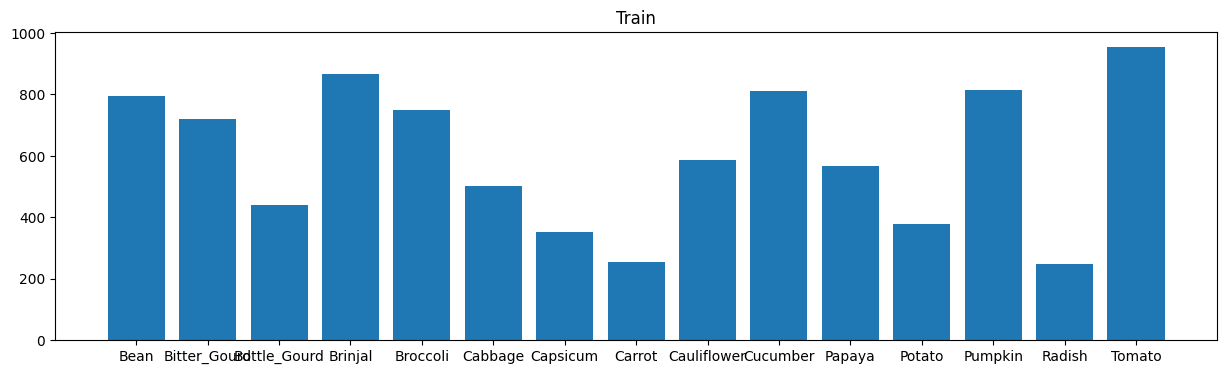

Class frequencies for Train:
[795 720 441 868 750 503 351 256 587 812 566 377 814 248 955]


In [28]:
# Plot class distributions for reference
fig, ax = plt.subplots(1, figsize=(15,4))

classes_names = train_data_131.class_names
y_unique, y_frequencies = np.unique(y_train_131, 
                          return_counts = True)
ax.bar(classes_names, y_frequencies)
ax.set_title('Train')

plt.show()
print('Class frequencies for Train:\n' + str(y_frequencies))

(https://www.advancinganalytics.co.uk/blog/2023/2/2/image-classification-dealing-with-imbalance-in-datasets)

We visualised the class distribution in 2 EDA, and here is one method of dealing with the obvious class imbalance: Data Augmentation. The goal of Data Augmentation is to produce more samples of data from existing data. Transformations will be done on image samples, effectively producing "new" data. For example, we can apply data augmentation on Carrot images, so that in the end there will be similar numbers of Carrot images and Tomato images (Carrot Bar will be around as tall as Tomato Bar). The idea is that, e.g. an image of a Carrot rotated 90 degrees is still a carrot, and slightly zooming into a Carrot image does not mean it is of another vegetable class.

Now we will see how we can actually apply it.

### Examples of augmentation in sample images

First, we will understand the transformations we can apply to some sample images. For this preview, we will use 131x131 images from the train dataset so that the images are clearer.

(source/reference for the code below: https://www.datacamp.com/tutorial/complete-guide-data-augmentation)

#### Flip left right

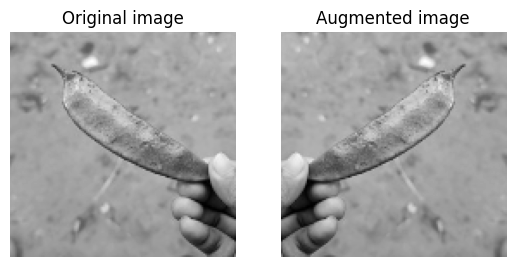

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# define a visualize function for plotting reusability
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original, cmap=plt.get_cmap('gray'))
    plt.axis("off")
 
    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented, cmap=plt.get_cmap('gray'))
    plt.axis("off")

flipped = tf.image.flip_left_right(X_train_131_norm[0])
visualize(X_train_131_norm[0], flipped)

#### 90 Degree Rotation

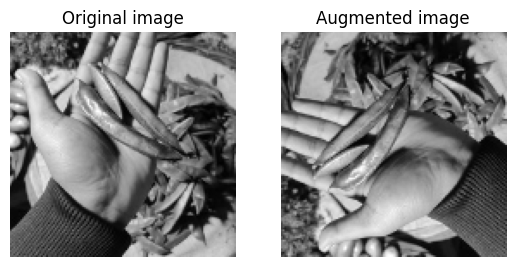

In [30]:
rotated90 = tf.image.rot90(X_train_131_norm[1])
visualize(X_train_131_norm[1], rotated90)

### Applying Data Augmentation to the train dataset

Here, instead of using transformations from tf.image, we will use Keras layers. I initially wanted to manually apply tf.image transformations but using 
Keras layers was more convenient and faster.

We will have 3 transformations to do: RandomFlip, RandomZoom and RandomRotation.

Then, join the dataset as below:
> unaugmented + RandomFlip(unaugmented) + RandomZoom(unaugmented) + RandomRotation(unaugmented).

This produces a new dataset with 4x the original sample size. The original images are combined with the augmented images.

#### Augmenting 37x37

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# https://pyimagesearch.com/2021/06/28/data-augmentation-with-tf-data-and-tensorflow/
# https://www.tensorflow.org/tutorials/images/data_augmentation

# define augmentations
trainAugRandomFlip = Sequential([
	layers.RandomFlip("horizontal_and_vertical")
])

trainAugRandomZoom = Sequential([
	layers.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15))
])

trainAugRandomRotation = Sequential([
	layers.RandomRotation(0.3)
])

batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# define function to augment and concat the augmented datasets to 
def prepare(ds, trainAug, trainAug2, trainAug3, shuffle=False, augment=False):

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
      # apply 3 separate transformations
    ds_augmented1 = ds.map(lambda x, y: (trainAug(x, training=True), y), 
                          num_parallel_calls=AUTOTUNE)

    ds_augmented2 = ds.map(lambda x, y: (trainAug2(x, training=True), y), 
                          num_parallel_calls=AUTOTUNE)

    ds_augmented3 = ds.map(lambda x, y: (trainAug3(x, training=True), y), 
                          num_parallel_calls=AUTOTUNE)

    # combine the 3 augmented with the original
    ds = ds.concatenate(ds_augmented1)
    ds = ds.concatenate(ds_augmented2)
    ds = ds.concatenate(ds_augmented3)
    ds = ds.shuffle(1000)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

# load the dataset to pass in prepare()
train_37 = tf.data.Dataset.from_tensor_slices((X_train_37_norm, y_train_37_enc))

# create dataset with augmented images
train_37_aug = prepare(train_37, trainAugRandomFlip, trainAugRandomRotation, trainAugRandomZoom, shuffle=True, augment=True)

train_37_aug

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 37, 37, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

The finished product, train_37_aug, contains both X and y, and can be passed into the model for training.

#### Augmenting 131x131

In [32]:
# use CPU to avoid InternalError
with tf.device('/CPU:0'):
    # load the dataset to pass in prepare()
    train_131 = tf.data.Dataset.from_tensor_slices((X_train_131_norm, y_train_131_enc))
    
    # create dataset with augmented images
    train_131_aug = prepare(train_131, trainAugRandomFlip, trainAugRandomRotation, trainAugRandomZoom, shuffle=True, augment=True)


train_131_aug

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 131, 131, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

# 4 Modelling and Evaluation

Now it is time to train the CNN model and see how well it can predict the classes!
- First, we will use a basic model on the dataset without unaugmented data to get an idea of how the model works
- We will also use augmented data to see for ourselves if doing so will actually improve accuracy.
- Then, we will redesign the CNN architecture (e.g. add/modify filters) in an attempt to improve model performance

In [33]:
# import libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

# 4 37x37

## 4.1 Basic Model (37x37)

First, we will use the 37x37 dataset for training the model.

For a start, we will use the code in Lab 3. This is because I definitely can't create a model from scratch (and I could mess up the whole architecture). This basic model will also serve as a baseline model architecture that we can seek to make improvements on in the later section, once we get a basic idea of how the model runs.

Epoch 1/20
283/283 [==============================] - 13s 6ms/step - loss: 2.2022 - accuracy: 0.3053 - val_loss: 1.9579 - val_accuracy: 0.3860
Epoch 2/20
283/283 [==============================] - 1s 5ms/step - loss: 1.6033 - accuracy: 0.5149 - val_loss: 1.5889 - val_accuracy: 0.5133
Epoch 3/20
283/283 [==============================] - 1s 5ms/step - loss: 1.3004 - accuracy: 0.6052 - val_loss: 1.4960 - val_accuracy: 0.5480
Epoch 4/20
283/283 [==============================] - 1s 5ms/step - loss: 1.0622 - accuracy: 0.6774 - val_loss: 1.3134 - val_accuracy: 0.5933
Epoch 5/20
283/283 [==============================] - 1s 5ms/step - loss: 0.8805 - accuracy: 0.7390 - val_loss: 1.3425 - val_accuracy: 0.5980
Epoch 6/20
283/283 [==============================] - 1s 5ms/step - loss: 0.7447 - accuracy: 0.7813 - val_loss: 1.1110 - val_accuracy: 0.6603
Epoch 7/20
283/283 [==============================] - 1s 5ms/step - loss: 0.5976 - accuracy: 0.8248 - val_loss: 1.1362 - val_accuracy: 0.6587
Epoch

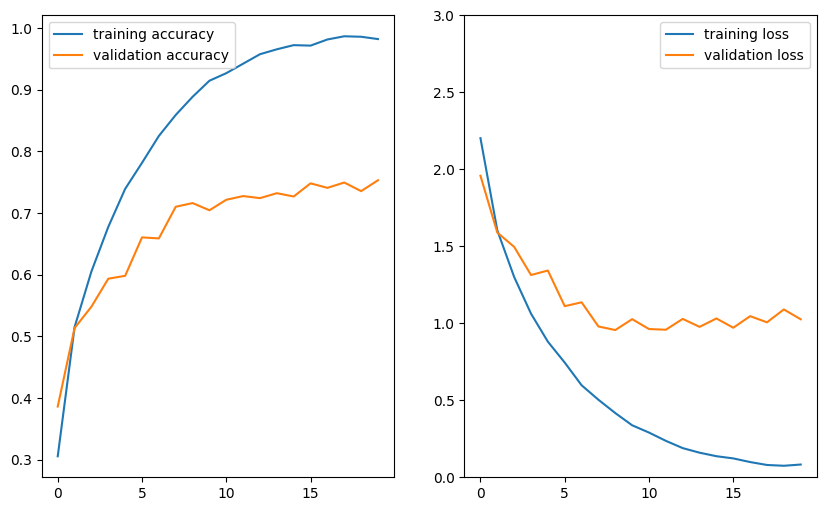

In [34]:
# Source: Lab 3 sample code
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

# number of classes for classification
num_classes = y_test_37_enc.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(37, 37, 1), activation='relu')) # 37x37 grayscale (1 channel image)
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_37_norm, y_train_37_enc, validation_data=(X_validation_37_norm, y_validation_37_enc), epochs=20, batch_size=32, verbose=1)

# model summmary
model.summary()

# Final evaluation of the model
scores = model.evaluate(X_test_37_norm, y_test_37_enc, verbose=0)
predictions = model.predict(X_test_37_norm)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print(scores)

# plot training/validation learning curves for accuracy and loss 
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim(0, 1)
ax[0].legend()
ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].set_ylim(0, 3)
ax[1].legend()
plt.show()

### Using visualkeras to visualise the model architecture

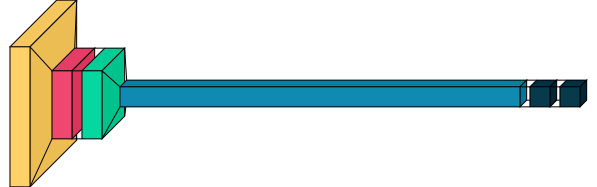

In [35]:
import visualkeras
visualkeras.layered_view(model)

## 4.2 Basic Model (37x37) with Augmented Data

Now, let's see if using augmented data will actually improve model performance.

Note that from this point onwards, augmented data is used for training all other models.

Epoch 1/20
1132/1132 [==============================] - 10s 6ms/step - loss: 1.8268 - accuracy: 0.4282 - val_loss: 1.5592 - val_accuracy: 0.5123
Epoch 2/20
1132/1132 [==============================] - 9s 5ms/step - loss: 1.2461 - accuracy: 0.6164 - val_loss: 1.1428 - val_accuracy: 0.6407
Epoch 3/20
1132/1132 [==============================] - 9s 5ms/step - loss: 0.9432 - accuracy: 0.7156 - val_loss: 0.9282 - val_accuracy: 0.7103
Epoch 4/20
1132/1132 [==============================] - 9s 5ms/step - loss: 0.7839 - accuracy: 0.7656 - val_loss: 1.0079 - val_accuracy: 0.6930
Epoch 5/20
1132/1132 [==============================] - 9s 5ms/step - loss: 0.6824 - accuracy: 0.7976 - val_loss: 0.8348 - val_accuracy: 0.7440
Epoch 6/20
1132/1132 [==============================] - 9s 5ms/step - loss: 0.6066 - accuracy: 0.8248 - val_loss: 0.8711 - val_accuracy: 0.7470
Epoch 7/20
1132/1132 [==============================] - 9s 5ms/step - loss: 0.5502 - accuracy: 0.8411 - val_loss: 0.8618 - val_accuracy

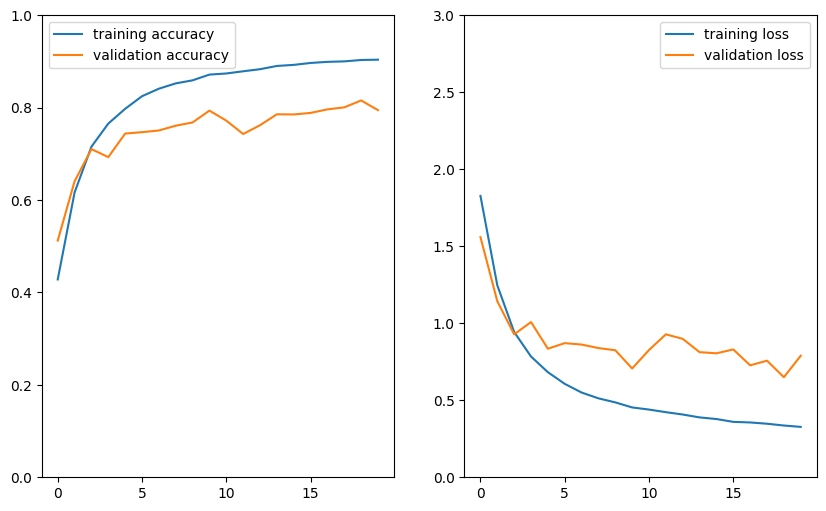

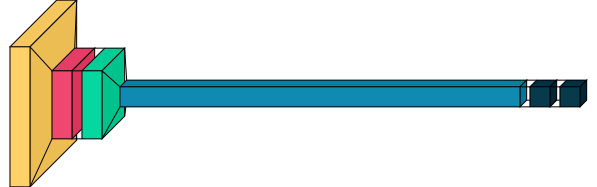

In [36]:
# Source: Lab 3 sample code
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

# number of classes for classification
num_classes = y_test_37_enc.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(37, 37, 1), activation='relu')) # 37x37 grayscale (1 channel image)
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(train_37_aug, validation_data=(X_validation_37_norm, y_validation_37_enc), epochs=20, batch_size=32, verbose=1)

# model summmary
model.summary()

# Final evaluation of the model
scores = model.evaluate(X_test_37_norm, y_test_37_enc, verbose=0)
predictions = model.predict(X_test_37_norm)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print(scores)

# plot training/validation learning curves for accuracy and loss 
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[0].set_ylim(0, 1)
ax[0].legend()

ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].set_ylim(0, 3)
ax[1].legend()
plt.show()

import visualkeras
visualkeras.layered_view(model)

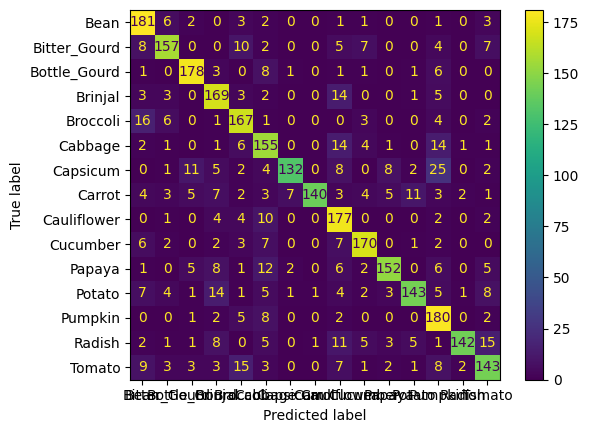

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classes_names = train_data_131.class_names

cm = confusion_matrix(y_test_37_enc.argmax(axis=1), predictions.argmax(axis=1), labels=np.arange(0, 15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes_names)
disp.plot()

### Trying a slightly more complex model from Lab 3

Epoch 1/20
1132/1132 [==============================] - 11s 6ms/step - loss: 2.0720 - accuracy: 0.3300 - val_loss: 1.5757 - val_accuracy: 0.4907
Epoch 2/20
1132/1132 [==============================] - 10s 6ms/step - loss: 1.3663 - accuracy: 0.5615 - val_loss: 1.0578 - val_accuracy: 0.6697
Epoch 3/20
1132/1132 [==============================] - 11s 7ms/step - loss: 1.0412 - accuracy: 0.6718 - val_loss: 1.0094 - val_accuracy: 0.6853
Epoch 4/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.8492 - accuracy: 0.7366 - val_loss: 0.8068 - val_accuracy: 0.7580
Epoch 5/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.7410 - accuracy: 0.7690 - val_loss: 0.6700 - val_accuracy: 0.7987
Epoch 6/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.6526 - accuracy: 0.7963 - val_loss: 0.6454 - val_accuracy: 0.8037
Epoch 7/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.6046 - accuracy: 0.8132 - val_loss: 0.6286 - val_ac

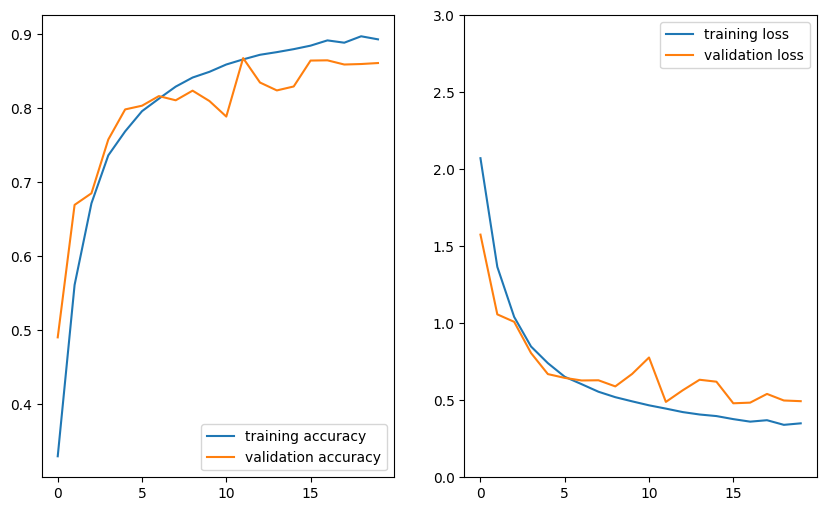

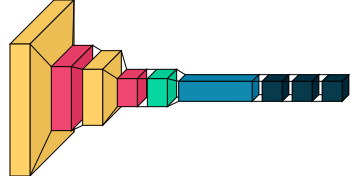

In [38]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)

# number of classes for classification
num_classes = y_test_37_enc.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(37, 37, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(train_37_aug, validation_data=(X_validation_37_norm, y_validation_37_enc), epochs=20, batch_size=32, verbose=1)

# model summmary
model.summary()

# Final evaluation of the model
scores = model.evaluate(X_test_37_norm, y_test_37_enc, verbose=0)
predictions = model.predict(X_test_37_norm)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print(scores)

# plot training/validation learning curves for accuracy and loss 
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim(0, 1)
ax[0].legend()
ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].set_ylim(0, 3)
ax[1].legend()
plt.show()

import visualkeras
visualkeras.layered_view(model)

Notice for augmented data, the model does not seem to be overfitting as severely as the one with normal data! The validation accuracy seems to almost always be higher than the training accuracy, and the validation loss is almost always lower than the training loss which is a very good thing.

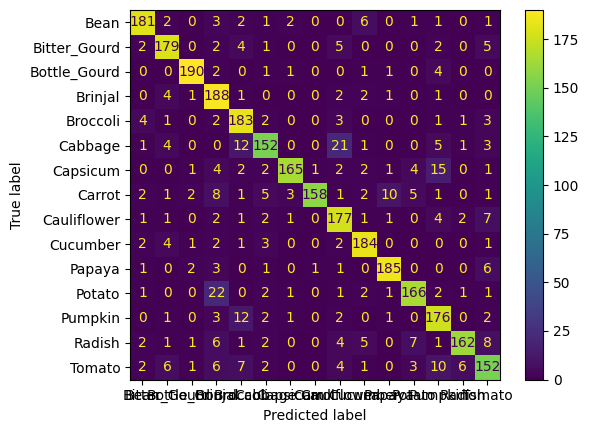

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classes_names = train_data_131.class_names

cm = confusion_matrix(y_test_37_enc.argmax(axis=1), predictions.argmax(axis=1), labels=np.arange(0, 15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes_names)
disp.plot()

## 4.3 Custom CNN Architecture (37x37)

Modifications (to the lab 3 complex model)
- Decreased filter size of first Conv2D layer from (5,5) to (3,3)
    - Theory: 5x5 is too large, since the Lab 3 model was used to detect handwritten digits.
    - 3x3 is smaller and will be able to detect the fine features in the 37x37 image better which are quite pixelated.
- Added 1 more Dense layer with 256 neurons


Epoch 1/20
1132/1132 [==============================] - 12s 7ms/step - loss: 1.9669 - accuracy: 0.3600 - val_loss: 1.4922 - val_accuracy: 0.5070
Epoch 2/20
1132/1132 [==============================] - 11s 7ms/step - loss: 1.2586 - accuracy: 0.6004 - val_loss: 1.0245 - val_accuracy: 0.6803
Epoch 3/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.9376 - accuracy: 0.7050 - val_loss: 0.7438 - val_accuracy: 0.7733
Epoch 4/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.7492 - accuracy: 0.7645 - val_loss: 0.7190 - val_accuracy: 0.7860
Epoch 5/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.6280 - accuracy: 0.8043 - val_loss: 0.5619 - val_accuracy: 0.8270
Epoch 6/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.5429 - accuracy: 0.8302 - val_loss: 0.5432 - val_accuracy: 0.8440
Epoch 7/20
1132/1132 [==============================] - 11s 7ms/step - loss: 0.4880 - accuracy: 0.8479 - val_loss: 0.5698 - val_ac

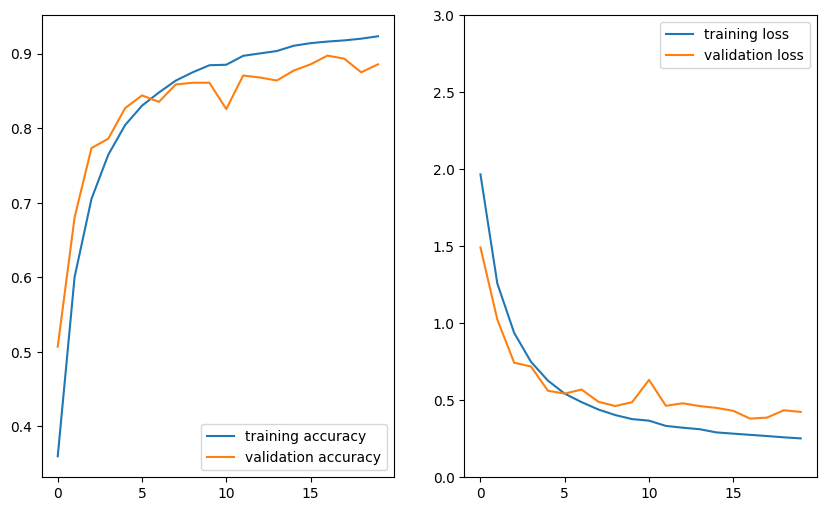

In [40]:
# number of classes for classification
num_classes = y_test_37_enc.shape[1]

# build the model
# create model
model_37 = Sequential()
model_37.add(Conv2D(30, (3, 3), input_shape=(37, 37, 1), activation='relu')) # changed 5x5 to 3x3
model_37.add(MaxPooling2D(pool_size=(2, 2)))
model_37.add(Conv2D(15, (2, 2), activation='relu'))
model_37.add(MaxPooling2D(pool_size=(2, 2)))
model_37.add(Dropout(0.2))
model_37.add(Flatten())
model_37.add(Dense(256, activation='relu')) # Added this Dense layer
model_37.add(Dense(128, activation='relu'))
model_37.add(Dense(50, activation='relu'))
model_37.add(Dense(num_classes, activation='softmax'))

# Compile model
model_37.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model_37.fit(train_37_aug, validation_data=(X_validation_37_norm, y_validation_37_enc), epochs=20, batch_size=16, verbose=1)

# model summmary
model_37.summary()

# Final evaluation of the model
scores = model_37.evaluate(X_test_37_norm, y_test_37_enc, verbose=0)
predictions = model_37.predict(X_test_37_norm)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print(scores)

# plot training/validation learning curves for accuracy and loss 
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim(0, 1)
ax[0].legend()
ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].set_ylim(0, 3)
ax[1].legend()
plt.show()

import visualkeras
visualkeras.layered_view(model_37)
model_37.save_weights('partA_37x37_weights.h5')

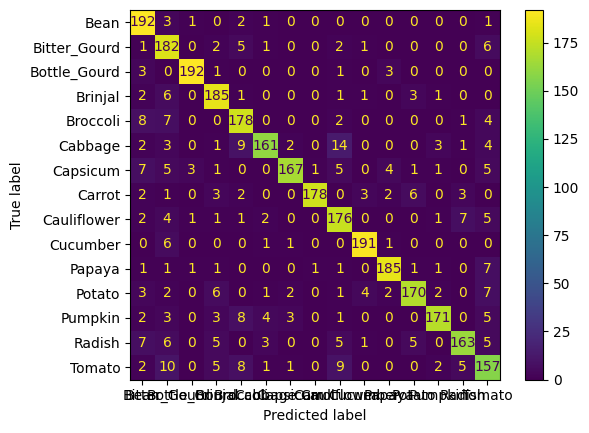

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot confusion matrix for this custom model
classes_names = train_data_131.class_names

cm = confusion_matrix(y_test_37_enc.argmax(axis=1), predictions.argmax(axis=1), labels=np.arange(0, 15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes_names)
disp.plot()

The diagonal squares for the classes are more yellow, which means that accuracy improved for most of the classes.

## 4.4 Custom CNN Architecture (131x131)

Modifications (to the lab 3 complex model)
- Added 1 Conv2D layer with 5x5 filter
    - Theory: 131x131 image has more details and so the edges are clearer, so I added a larger 5x5 filter to capture these edges first.
- Increased MaxPooling size, now 4x4 -> 3x3 -> 2x2
- Increased filter size of second Conv2D layer to 3x3
- Increased neuron number of the 3 Dense layers

Epoch 1/20
1132/1132 [==============================] - 16s 9ms/step - loss: 2.0046 - accuracy: 0.3256 - val_loss: 1.4633 - val_accuracy: 0.5143
Epoch 2/20
1132/1132 [==============================] - 14s 9ms/step - loss: 1.2335 - accuracy: 0.5905 - val_loss: 0.9641 - val_accuracy: 0.7013
Epoch 3/20
1132/1132 [==============================] - 14s 9ms/step - loss: 0.9149 - accuracy: 0.6967 - val_loss: 0.7498 - val_accuracy: 0.7497
Epoch 4/20
1132/1132 [==============================] - 14s 9ms/step - loss: 0.7292 - accuracy: 0.7587 - val_loss: 0.5762 - val_accuracy: 0.8077
Epoch 5/20
1132/1132 [==============================] - 14s 9ms/step - loss: 0.6135 - accuracy: 0.7983 - val_loss: 0.4575 - val_accuracy: 0.8577
Epoch 6/20
1132/1132 [==============================] - 14s 9ms/step - loss: 0.5267 - accuracy: 0.8252 - val_loss: 0.5573 - val_accuracy: 0.8183
Epoch 7/20
1132/1132 [==============================] - 14s 9ms/step - loss: 0.4618 - accuracy: 0.8471 - val_loss: 0.3519 - val_ac

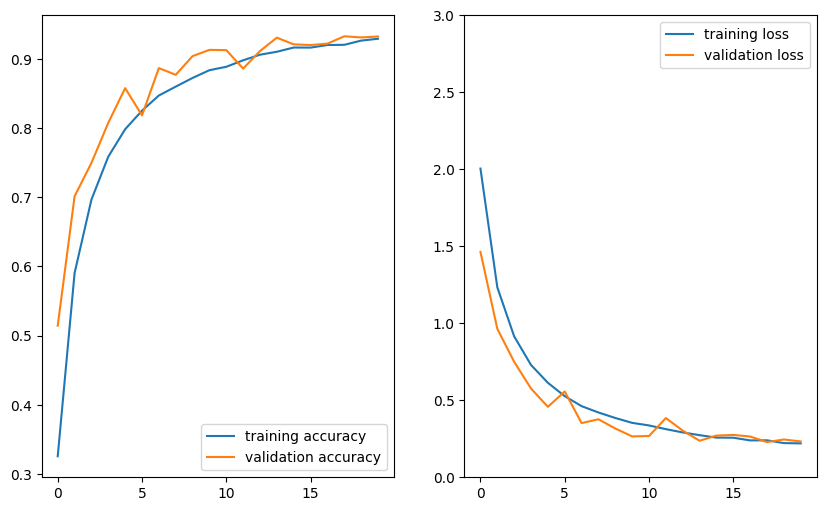

In [42]:
# number of classes for classification
num_classes = y_test_131_enc.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(50, (5, 5), input_shape=(131, 131, 1), activation='relu')) # added 1 extra 5x5 filter
model.add(MaxPooling2D(pool_size=(4, 4))) # pool size 4x4
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3))) # increased pool size to 3x3
model.add(Conv2D(15, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu')) # Added this Dense layer with more neurons
model.add(Dense(256, activation='relu')) # increased neurons
model.add(Dense(64, activation='relu')) # increased neurons
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(train_131_aug, validation_data=(X_validation_131_norm, y_validation_131_enc), epochs=20, batch_size=16, verbose=1)

# model summmary
model.summary()

# Final evaluation of the model
scores = model.evaluate(X_test_131_norm, y_test_131_enc, verbose=0)
predictions = model.predict(X_test_131_norm)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print(scores)

# plot training/validation learning curves for accuracy and loss 
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim(0, 1)
ax[0].legend()
ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].set_ylim(0, 3)
ax[1].legend()
plt.show()

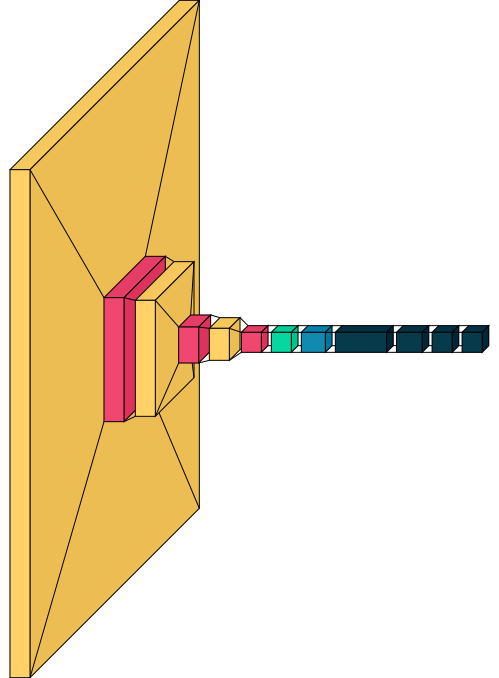

In [43]:
# at least managed to visualise the model
import visualkeras
visualkeras.layered_view(model)

Unfortunately, my computer was unable to run the second epoch for the 131x131 model. However, the first epoch had a validation accuracy of 0.4840 which was comparable to that of the custom 37x37 model. We could expect the final test error for this model to be around 10% too, which is not bad.

#### UPDATE (23/5/2024): 

I managed to run the 131x131 model in the Lab, the cell output of the model details is above.

For this run, there is a CNN test error of 6.80% (and a test accuracy of 100% - 6.80% = 93.2%). The error is much lower than I expected!

It appears that my theory for implementing the model architecture is correct, hence the improvement in accuracy/error rate.